In [257]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [258]:
df = pd.read_csv("health care diabetes.csv")
# to print the features and dataset size
print(df.shape)

(768, 9)


In [259]:
#to identify the features and target variable
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [260]:
#Outcome is target variable and rest are features
#Find null values in the dataset 
df.isnull().sum().sum()

0

In [261]:
# to know more about each feature
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Having zero values in the columns - Glucose, BloodPressure, SkinThickness, Insulin, BMI doesn't make any sense, so replacing them with Median the most repeating value



In [262]:
features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in features:
    df.loc[ df[col] == 0 | np.isnan(df[col]), col ] = df[col].median()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


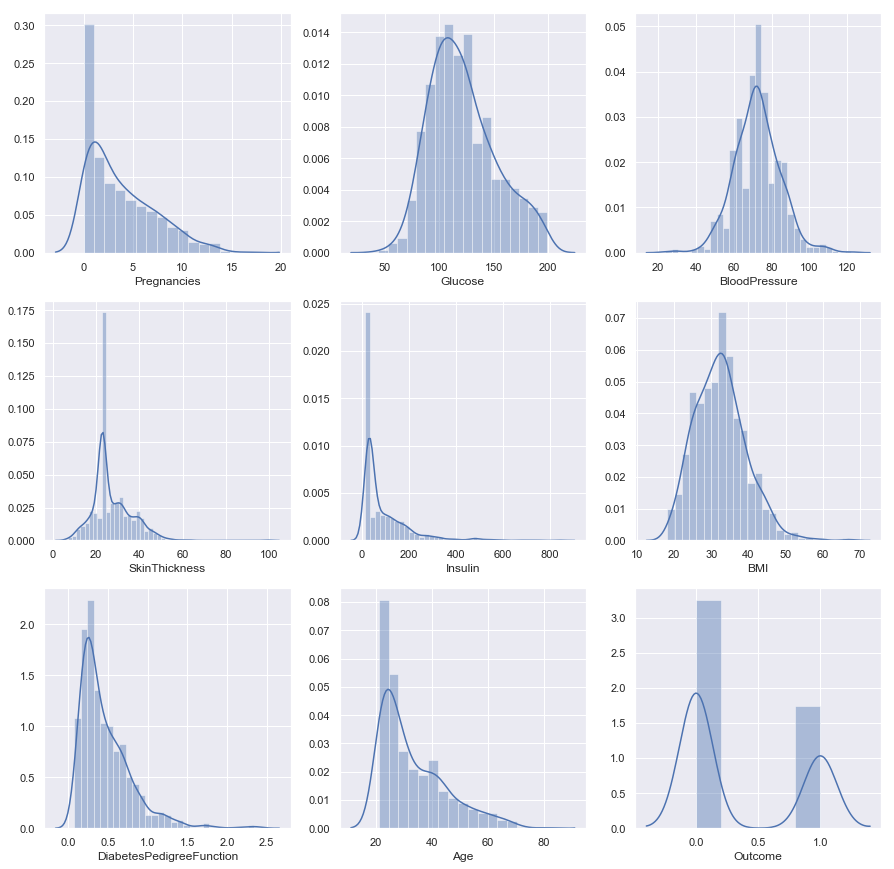

In [263]:
features=df.columns
fig,ax=plt.subplots(3,3,figsize=(15,15))
for variable,subplot in zip(features,ax.flatten()):
    sns.distplot(df[variable],ax=subplot)

0    500
1    268
Name: Outcome, dtype: int64


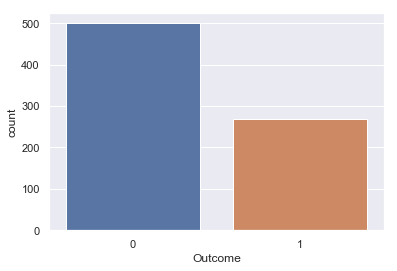

In [264]:
## Plotting the count plot to identify the frequnecy of values
sns.countplot(df["Outcome"])
##prinitng number of values for each type
print(df["Outcome"].value_counts())

Outcomes as 1 are less when compared to outcome 0 , we will balancing the dataset before fitting it to a model

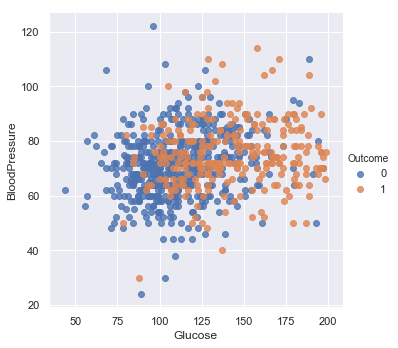

In [265]:
# to Identify relationship between glucose and blood pressure
sns.lmplot(x='Glucose', y='BloodPressure', data=df,
           fit_reg=False, # No regression line
           hue='Outcome')   # Color by evolution stage

Post Glucose value of 125 the more chances that outcome is diabetis and it is indepdent of Blood Pressure

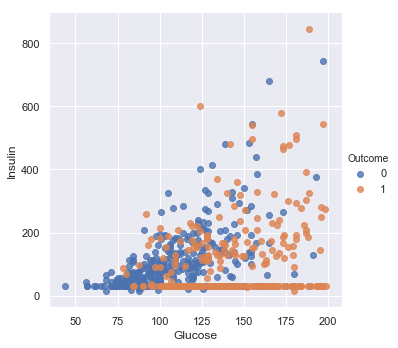

In [266]:
# to Identify relationship between glucose and blood pressure
sns.lmplot(x='Glucose', y='Insulin', data=df,
           fit_reg=False, # No regression line
           hue='Outcome')   # Color by evolution stage

There exists a relationship between Insluin and Glucose, post 120 in glucose and post 200 the more chances are there for outcome to be postive

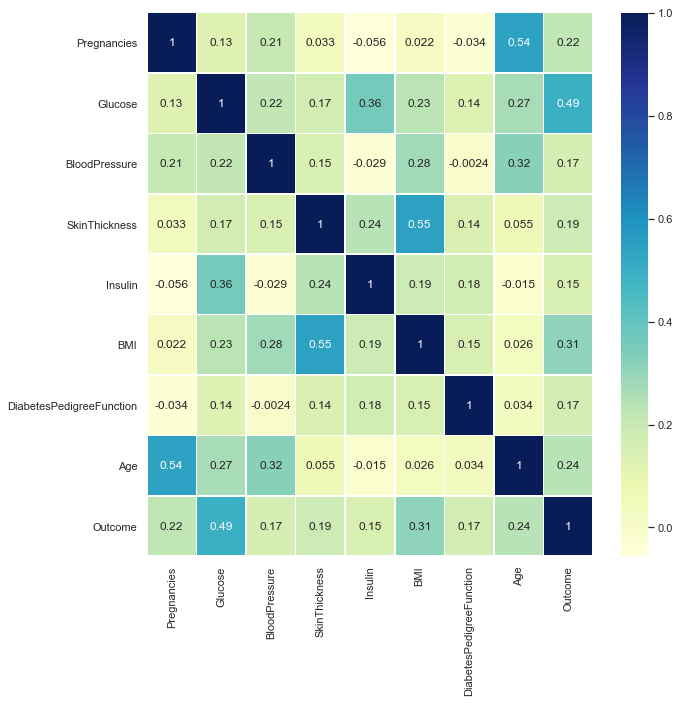

In [267]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

Almost all the features are postively corelated and Age vs preganancies have higher corrleation, followed by Insulin vs Glucose

Balancing the Dataframe 

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y=df['Outcome']
x=df.drop('Outcome',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape

(537, 8)

<h2>K- Nearest Neighbours algoithm </h2>

In [269]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("ACuuracy:"+str(accuracy_score(y_test, y_pred)*100))

ACuuracy:74.02597402597402


In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [271]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
confusion=confusion_matrix(y_test,y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[121  30]
 [ 30  50]] 

accuracy 0.7402597402597403
precision 0.625
recall 0.625
Sensitivity 0.625
Positive Predection Rate 0.625
Negative Predection rate 0.8013245033112583
False positive Predection Rate 0.1986754966887417


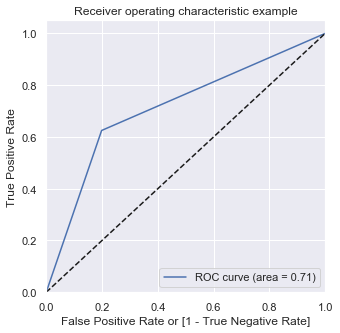

In [272]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_test, y_pred)

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
# Create a based model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\HP\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [274]:
y_pred=rf.predict(x_test)
Y_pred=pd.DataFrame(y_pred)
print("ACuuracy:"+str(accuracy_score(y_test, y_pred)*100))

ACuuracy:74.45887445887446


In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       151
           1       0.67      0.53      0.59        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



In [276]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
confusion=confusion_matrix(y_test,y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[130  21]
 [ 38  42]] 

accuracy 0.7445887445887446
precision 0.6666666666666666
recall 0.525
Sensitivity 0.525
Positive Predection Rate 0.6666666666666666
Negative Predection rate 0.7738095238095238
False positive Predection Rate 0.1390728476821192


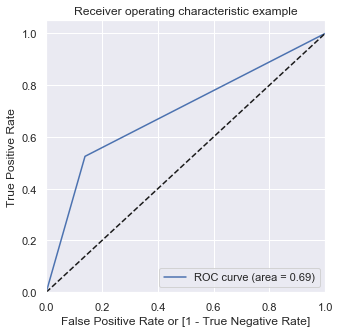

In [277]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_test, y_pred)

<h3> KNN has Better ROC value and other mertics are in par with Random forest, So KNN model is preferable </h3>